In [7]:
import networkx as nx
import math
import matplotlib.pyplot as plt

# Vertex will be colored in red if that vertex represents cell with number 1 in it...
legend = {1: 'red', 2: 'green', 3: 'orange', 4: 'pink'}
S = [[3,4,1,0], 
     [0,2,0,0], 
     [0,0,2,0], 
     [0,1,4,3]]

legend = {1: 'red', 2: 'green', 3: 'orange', 4: 'pink', 5: 'violet', 6: 'blue', 7: 'yellow', 8: 'white', 9: 'gray' }
S = [[8,7,6,9,0,0,0,0,0], 
     [0,1,0,0,0,6,0,0,0], 
     [0,4,0,3,0,5,8,0,0],
     [4,0,0,0,0,0,2,1,0], 
     [0,9,0,5,0,0,0,0,0],
     [0,5,0,0,4,0,3,0,6], 
     [0,2,9,0,0,0,0,0,8],
     [0,0,4,6,9,0,1,7,3],
     [0,0,0,0,0,1,0,0,4]]

In [8]:
G=nx.Graph()

# ADD NODES

nodes = []
counter = 1
for row in S:
    for cell in row:
        nodes.append(counter)
        counter += 1    
G.add_nodes_from(nodes)

# ADD EDGES

edges = []
N = int(math.sqrt(len(nodes)))

# Create subfield
scale = [] 
element = []
for i in range (N):
    element.append(i)
    if(len(element)==int(math.sqrt(N))):
        scale.append(element)
        element = []
subfield_def = {}
x = 0
for i in scale:
    for j in scale:
        subfield_def[x] = [i,j]
        x += 1
    
#  Check connection 
for index, cell in enumerate(nodes):  
    row = index // N
    column = index % N
    for key, value in subfield_def.items(): 
        if row in value[0] and column in value[1]:
            subfield = key
    
    for index_n, cell_n in enumerate(nodes):  
        row_n = index_n // N
        column_n = index_n % N
        for key, value in subfield_def.items(): 
            if row_n in value[0] and column_n in value[1]:
                subfield_n = key
        if((row == row_n or column == column_n or subfield == subfield_n) 
           and ((cell_n,cell)not in edges) and (cell != cell_n)):
            edges.append((cell,cell_n))
            
G.add_edges_from(edges)
print (len(edges))
print (edges)

810
[(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 19), (1, 20), (1, 21), (1, 28), (1, 37), (1, 46), (1, 55), (1, 64), (1, 73), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 19), (2, 20), (2, 21), (2, 29), (2, 38), (2, 47), (2, 56), (2, 65), (2, 74), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 19), (3, 20), (3, 21), (3, 30), (3, 39), (3, 48), (3, 57), (3, 66), (3, 75), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 13), (4, 14), (4, 15), (4, 22), (4, 23), (4, 24), (4, 31), (4, 40), (4, 49), (4, 58), (4, 67), (4, 76), (5, 6), (5, 7), (5, 8), (5, 9), (5, 13), (5, 14), (5, 15), (5, 22), (5, 23), (5, 24), (5, 32), (5, 41), (5, 50), (5, 59), (5, 68), (5, 77), (6, 7), (6, 8), (6, 9), (6, 13), (6, 14), (6, 15), (6, 22), (6, 23), (6, 24), (6, 33), (6, 42), (6, 51), (6, 60), (6, 69), (6, 78), (7, 8), (7, 9), (7, 16), (7, 17), (7, 18), (7, 25), (7, 26), (7, 27), (7, 34), (7, 

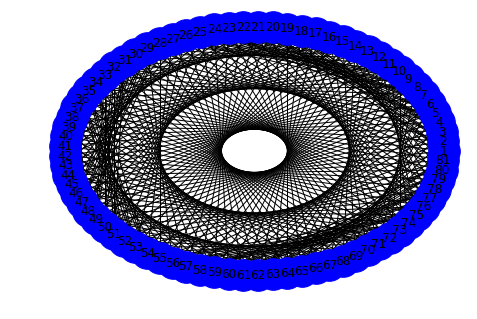

In [9]:
nx.draw_circular(G, with_labels = True, node_size=1000, node_color='b' )

In [10]:
# https://codereview.stackexchange.com/questions/203319/greedy-graph-coloring-in-python
def vertex_coloring_random_order(graph, color_map):
    for node in sorted(graph, key=lambda x: len(graph[x]), reverse=True):
        if node not in color_map:
            neighbor_colors = set(color_map.get(neigh) for neigh in graph[node])
            color_map[node] = next(color for color in range(1, N+1) if color not in neighbor_colors)
    return color_map

In [11]:
def vertex_coloring_brelaz(graph, color_map):
    print(color_map)
    print (len(color_map) == len(graph))
    while len(color_map) < len(graph):
        node = get_most_saturated_vartex(graph, color_map)
        print("Most saturated: ", node)
        neighbor_colors = set(color_map.get(neigh) for neigh in graph[node])
        color_map[node] = next(color for color in range(1, N+1) if color not in neighbor_colors)
    print(color_map)
    return color_map

def get_most_saturated_vartex(graph, color_map):
    max_satiation = 0
    max_satiation_vertex = 0
    for node in sorted(graph, key=lambda x: len(graph[x]), reverse=True):
        if node not in color_map:
            satiation = get_satiation_of_vertex(graph, color_map, node)
            if satiation > max_satiation:
                max_satiation_vertex = node
                max_satiation = satiation
    return max_satiation_vertex

def get_satiation_of_vertex(graph, color_map, node_n):
    satiation = 0
    for key, value in color_map.items(): 
        if graph.has_edge(key, node_n ):
            satiation += 1
    print ("satiation ", node_n, " ", satiation)
    return satiation


In [12]:
cell_number = 0
color_map = {}
color_map_real_color = []
 
# Color vertices that represent nonempty cells
for row in S:
    for cell in row:
        cell_number += 1
        if (cell != 0):
            color_map[cell_number] = cell
            
# Color vertices that represent empty cells
color_map = vertex_coloring_brelaz(G, color_map)

# Join real color to the number according to legend
for node in G:
    color_map_real_color.append(legend[color_map[node]])
    
# Draw the graph
nx.draw_circular(G, node_color = color_map_real_color, with_labels = True, node_size=1000)


{1: 8, 2: 7, 3: 6, 4: 9, 11: 1, 15: 6, 20: 4, 22: 3, 24: 5, 25: 8, 28: 4, 34: 2, 35: 1, 38: 9, 40: 5, 47: 5, 50: 4, 52: 3, 54: 6, 56: 2, 57: 9, 63: 8, 66: 4, 67: 6, 68: 9, 70: 1, 71: 7, 72: 3, 78: 1, 81: 4}
False
satiation  5   9
satiation  6   8
satiation  7   8
satiation  8   7
satiation  9   9
satiation  10   7
satiation  12   8
satiation  13   7
satiation  14   7
satiation  16   6
satiation  17   5
satiation  18   7
satiation  19   9
satiation  21   10
satiation  23   8
satiation  26   6
satiation  27   8
satiation  29   9
satiation  30   8
satiation  31   8
satiation  32   6
satiation  33   8
satiation  36   8
satiation  37   5
satiation  39   7
satiation  41   4
satiation  42   6
satiation  43   8
satiation  44   7
satiation  45   9
satiation  46   7
satiation  48   9
satiation  49   8
satiation  51   8
satiation  53   7
satiation  55   6
satiation  58   9
satiation  59   7
satiation  60   8
satiation  61   10
satiation  62   8
satiation  64   10
satiation  65   13
satiation  69 

StopIteration: 

In [13]:
# Apply graph coloring to Sudoku
cell_number = 0
S_solved = []
for row in S:
    row_solved = []
    for cell in row:
        cell_number += 1
        row_solved.append(color_map[cell_number])
    S_solved.append(row_solved)
        
print (S_solved)

KeyError: 5